In [1]:
from typing import TypedDict

from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import END, START, StateGraph

In [2]:
load_dotenv

llm = ChatGoogleGenerativeAI(model = 'gemini-2.5-flash-lite')

In [3]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [4]:
def create_outline(state: BlogState) -> BlogState:
    title = state['title']
    prompt = f"Create detailed outline for a blog on topic - {title}"
    outline = llm.invoke(prompt).content
    
    return {'outline': outline}


def create_content(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']
    prompt = f"Create blog content with title: {title} and outline: \n{outline}"
    content = llm.invoke(prompt).content
    
    return {'content': content}

In [5]:
graph = StateGraph(BlogState)

graph.add_node('create_outline', create_outline)
graph.add_node('create_content', create_content)

graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_content')
graph.add_edge('create_content', END)

workflow = graph.compile()

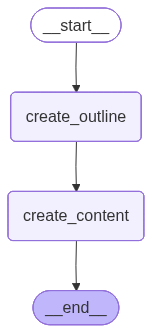

In [6]:
workflow

In [7]:
initial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(initial_state)
print(final_state)

{'title': 'Rise of AI in India', 'outline': '## Blog Post Outline: The Rise of AI in India: Transforming Industries and Shaping the Future\n\n**I. Introduction (Catchy Title & Hook)**\n\n*   **A. Title Options (Choose one that resonates):**\n    *   The AI Revolution is Here: How India is Leading the Charge\n    *   From IT Hub to AI Powerhouse: India\'s Ascendancy in Artificial Intelligence\n    *   Beyond the Hype: The Real Impact of AI on India\'s Growth Story\n    *   India\'s AI Awakening: Opportunities, Challenges, and the Road Ahead\n*   **B. Hook (Engage the reader immediately):**\n    *   Start with a compelling statistic about AI adoption or investment in India.\n    *   Pose a thought-provoking question about the future of work and life in India due to AI.\n    *   Share a brief, relatable anecdote about AI\'s presence in everyday Indian life.\n*   **C. Thesis Statement:** Briefly state the blog\'s main argument – that India is experiencing a significant and transformative r